In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
receipts = pd.read_csv("/Users/amarnathreddychinthapalli/Desktop/Fetch-Rewards-Coding-Exercise/data/receipts.csv")

In [3]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bonusPointsEarned        544 non-null    float64
 1   bonusPointsEarnedReason  544 non-null    object 
 2   pointsEarned             609 non-null    float64
 3   purchasedItemCount       635 non-null    float64
 4   rewardsReceiptItemList   679 non-null    object 
 5   rewardsReceiptStatus     1119 non-null   object 
 6   totalSpent               684 non-null    float64
 7   userId                   1119 non-null   object 
 8   _id.$oid                 1119 non-null   object 
 9   createDate.$date         1119 non-null   int64  
 10  dateScanned.$date        1119 non-null   int64  
 11  finishedDate.$date       568 non-null    float64
 12  modifyDate.$date         1119 non-null   int64  
 13  pointsAwardedDate.$date  537 non-null    float64
 14  purchaseDate.$date      

In [4]:
receipts.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5.0,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,1.609601e+12


In [5]:
receipts.isnull().sum()

bonusPointsEarned          575
bonusPointsEarnedReason    575
pointsEarned               510
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
_id.$oid                     0
createDate.$date             0
dateScanned.$date            0
finishedDate.$date         551
modifyDate.$date             0
pointsAwardedDate.$date    582
purchaseDate.$date         448
dtype: int64

In [6]:
null_percentages = receipts.isnull().mean(axis=0) * 100
# Print the percentage of null values for each value
for col_name, null_percent in null_percentages.items():
    print(f"{col_name}: {null_percent:.2f}%")

bonusPointsEarned: 51.39%
bonusPointsEarnedReason: 51.39%
pointsEarned: 45.58%
purchasedItemCount: 43.25%
rewardsReceiptItemList: 39.32%
rewardsReceiptStatus: 0.00%
totalSpent: 38.87%
userId: 0.00%
_id.$oid: 0.00%
createDate.$date: 0.00%
dateScanned.$date: 0.00%
finishedDate.$date: 49.24%
modifyDate.$date: 0.00%
pointsAwardedDate.$date: 52.01%
purchaseDate.$date: 40.04%


In [7]:
print(receipts.describe())

       bonusPointsEarned  pointsEarned  purchasedItemCount   totalSpent  \
count         544.000000    609.000000           635.00000   684.000000   
mean          238.893382    585.962890            14.75748    77.796857   
std           299.091731   1357.166947            61.13424   347.110349   
min             5.000000      0.000000             0.00000     0.000000   
25%             5.000000      5.000000             1.00000     1.000000   
50%            45.000000    150.000000             2.00000    18.200000   
75%           500.000000    750.000000             5.00000    34.960000   
max           750.000000  10199.800000           689.00000  4721.950000   

       createDate.$date  dateScanned.$date  finishedDate.$date  \
count      1.119000e+03       1.119000e+03        5.680000e+02   
mean       1.611800e+12       1.611800e+12        1.611058e+12   
std        1.484091e+09       1.484091e+09        9.534641e+08   
min        1.604089e+12       1.604089e+12        1.609687e+

/Users/amarnathreddychinthapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amarnathreddychinthapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amarnathreddychinthapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

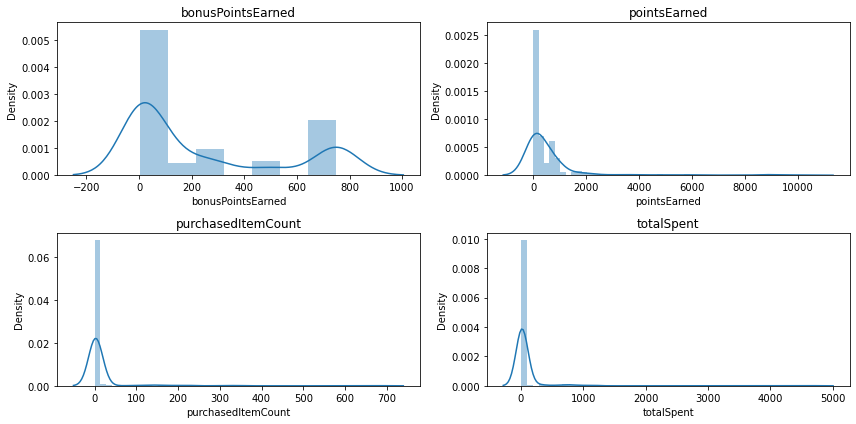

In [8]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['bonusPointsEarned', 'pointsEarned', 'purchasedItemCount', 'totalSpent']):
    plt.subplot(2, 2, i+1)
    sns.distplot(receipts[col].dropna())
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
for col in ['rewardsReceiptStatus', 'userId']:
    print(f"{col}:")
    print(receipts[col].value_counts())
    print()

rewardsReceiptStatus:
FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: rewardsReceiptStatus, dtype: int64

userId:
5fc961c3b8cfca11a077dd33    436
59c124bae4b0299e55b0f330     58
54943462e4b07e684157a532     50
5fa41775898c7a11a6bcef3e     21
5ff5d15aeb7c7d12096d91a2     20
                           ... 
600258dafb296c4ef805d9b7      1
60024f24e257124ec6b99a13      1
60037005e257124ec6b99ec2      1
60025fe0e257124ec6b99a87      1
60268c78efa6011bb151077d      1
Name: userId, Length: 258, dtype: int64



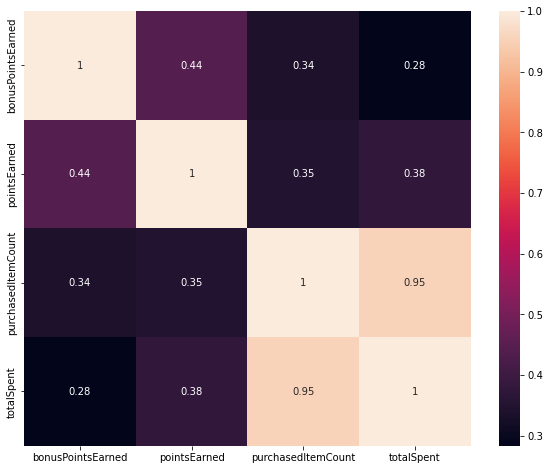

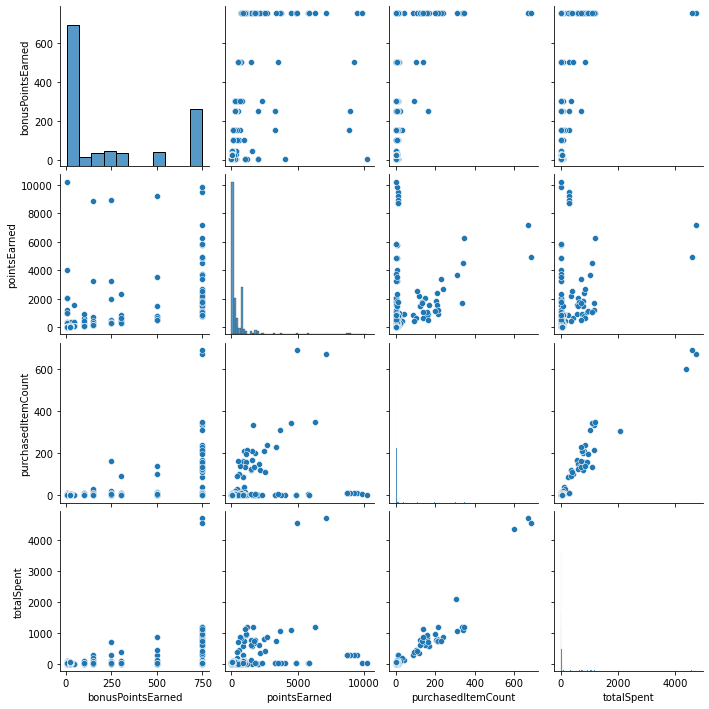

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(receipts[['bonusPointsEarned', 'pointsEarned', 'purchasedItemCount', 'totalSpent']].corr(), annot=True)
plt.show()

# Relationship between numerical variables
sns.pairplot(receipts[['bonusPointsEarned', 'pointsEarned', 'purchasedItemCount', 'totalSpent']])
plt.show()

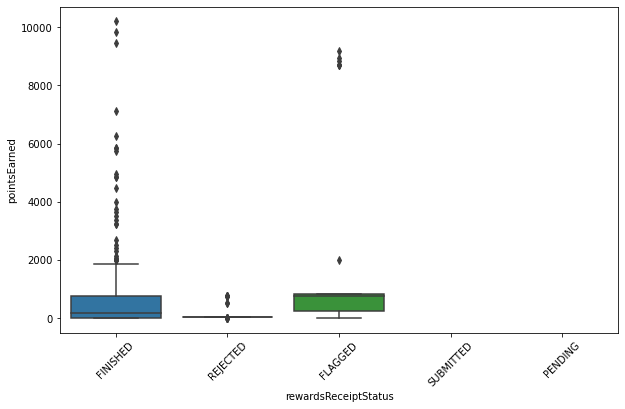

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rewardsReceiptStatus', y='pointsEarned', data=receipts)
plt.xticks(rotation=45)
plt.show()

## Data Quality Issues

### High Percentage of Missing Values:
Several columns have a high percentage of missing values, ranging from 38.87% to 52.01%. These include bonusPointsEarned, bonusPointsEarnedReason, pointsEarned, purchasedItemCount, rewardsReceiptItemList, totalSpent, and pointsAwardedDate. Such a high proportion of missing values can significantly impact the reliability and usefulness of any analysis or modeling performed on this data.  

### Variable Specific Issues:
rewardsReceiptStatus has a 0% missing value rate, suggesting that it might be a key variable or perhaps the data collection process specifically records this field without fail. 

finishedDate has a relatively high missing value rate of 49.24%, indicating potential issues with recording the completion date of certain transactions or processes.  

purchaseDate also has a substantial missing value rate of 40.04%, which could hinder the analysis involving temporal patterns or time-based insights.

### Uniformity of Data Format: 
The data includes several date-related fields (createDate, dateScanned, finishedDate, modifyDate, pointsAwardedDate, purchaseDate) represented in the format of $date. It might be necessary to ensure uniformity in the format or convert them into a standard date-time format for consistency and ease of analysis.  

### Impact on Analysis: 
The high percentage of missing values can lead to biased analysis results, inaccurate insights, and reduced model performance if not appropriately addressed. Strategies such as imputation, data collection refinement, or adjusting analysis techniques may be necessary to mitigate these issues and extract meaningful insights from the dataset.